In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import *

In [33]:
data = pd.read_csv("../data/data.csv", index_col=0)
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']

data = data.drop('time', axis=1)
data

,price
time,
2019-01-02 07:00:00+00:00,39.8100
2019-01-02 07:15:00+00:00,39.2350
2019-01-02 07:30:00+00:00,39.3625
2019-01-02 07:45:00+00:00,39.3825
2019-01-02 08:00:00+00:00,39.1250
...,...
2019-02-28 22:15:00+00:00,43.3125
2019-02-28 22:30:00+00:00,43.3025
2019-02-28 22:45:00+00:00,43.3200


In [34]:
df = pd.DataFrame(data)

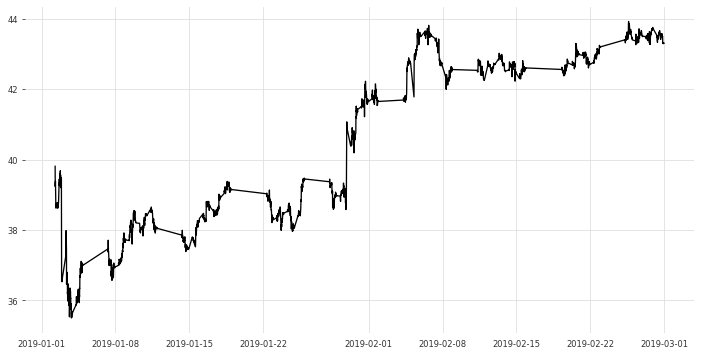

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df)
plt.show()

In [36]:
test_size = 65
train = df[:-test_size]
test = df[-test_size:]

In [37]:
series = TimeSeries.from_values(train.values)

In [38]:
model = ARIMA(p=65, d=2, q=7)

In [39]:
%%time
model.fit(series)

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\spark\.conda\envs\stan_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Wall time: 4min 20s


In [40]:
pred = model.predict(len(test)).pd_series()

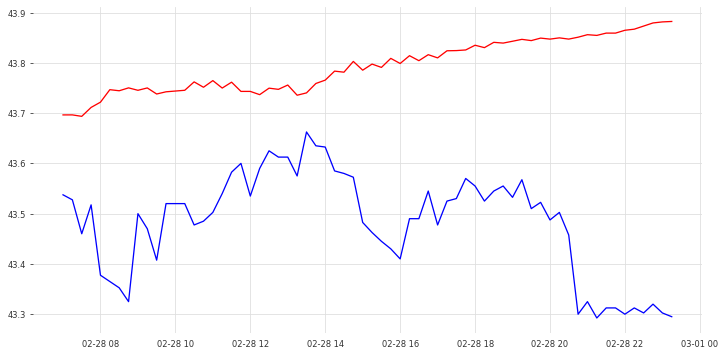

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test, c='b', label='true')
ax.plot(test.index, pred, c='r', label='predict')

plt.show()